# Линейная регрессия

В этом домашнем задании мы работаем с набором данных о уровне счастья в странах за 2019 год. Он доступен в репозитории или можно скачать с Kaggle [соревнования](https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv).

Все импорты помещаем сверху, под этой клеткой.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
rcParams['figure.figsize'] = 12, 6

from sklearn.model_selection import train_test_split

1.Считайте данные с помощью pandas в переменную `df`.

In [2]:
df = pd.read_csv('_2019.csv')

2.Выведите диаграмму рассеяния признаков 'Score' и 'GDP per capita' используя regplot в seaborn.

<AxesSubplot:xlabel='Score', ylabel='GDP per capita'>

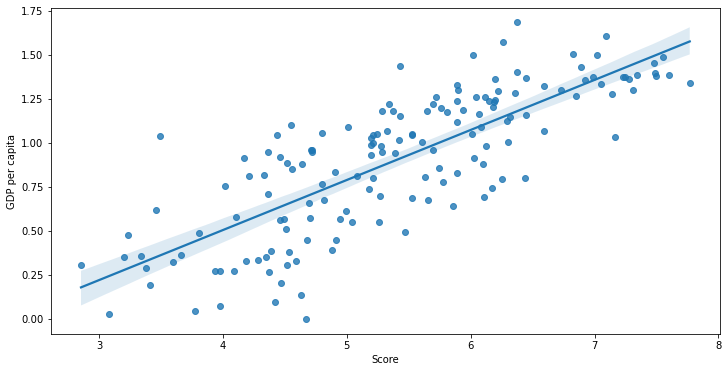

In [3]:
sns.regplot(x=df['Score'], y=df['GDP per capita'])

Мы будем моделировать эту зависимость. Кажется, что она должна хорошо описываться линейной моделью.

## Решение задачи линейной регрессии методом градиентного спуска

3.Реализуйте формулу предсказания линейной регрессии в функции predict. Функция возвращает предсказание. Предсказание строится как матрица признаков умноженная на веса. 

In [4]:
def predict(X, theta):
    prdiction = np.dot(X, theta)
    return prdiction

4.Дополните функцию затрат, формула которой приведена в слайдах лекции о Линейной регрессии (подсказка - формула такая же, как если бы мы считали mean squared error).   
Функция cost принимает вектор параметров theta, матрицу наших признаков X и реальные значения  целевой переменной y.


In [7]:
def cost(theta, X, y):
    m = len(y)
    predictions = predict(X, theta)
    cost = sum((predictions - y) ** 2) / m
    return cost

5.Дополните функции get_gradient и gradient_descent, которые позволят реализовать  алгоритм градиетного спуска. Заполните все места, где стоят троеточия. Используйте реализованные в предыдущих заданиях функции cost и predict.
Для поиска theta используйте формулу обновления параметров со слайдов лекции о линейной регрессии.

In [81]:
def get_gradient(w, x, y):
    y_estimate = predict(x, w)
    error = y - y_estimate
    gradient = (1.0/len(x)) * x.T.dot(error)
    mean_squared_error = cost(w, x, y)
    return gradient, mean_squared_error

In [99]:
def gradient_descent(X, y, theta, learning_rate, eps, max_iterations):
    cost_history = []
    theta_history = []
    iterations = 1
    while True:
        gradient, error = get_gradient(theta, X, y)
        cost_history.append(error.item())
        #print(f'Gradient = {gradient}')
        
        new_theta = theta + learning_rate * gradient
        theta_history.append(new_theta)
        # Условие остановки
        if error < eps:
            print( "Алгоритм сошёлся.")
            break
            
        # Второе условие остановки
        if iterations >= max_iterations:
            print("Достигнуто максимальное число итераций")
            break

        # Выводим информацию каждые 100 итераций
        if iterations % 100 == 0:
            print ("Итерация: %d - Ошибка на трейн данных: %.4f" %(iterations, error))

        iterations += 1
        theta = new_theta
    return theta, cost_history, theta_history, iterations


Подготовим данные.

In [10]:
X = df['GDP per capita'].values.reshape(-1,1)
y = df['Score'].values.reshape(-1,1)

6.Разделите X и y на train и test подвыборки в соотношении 80/20. Поскольку у нас мало данных, validation выборку выделять не будем. Запишите результаты в X_train, y_train, X_test, y_test.

In [16]:
test_size = 0.2

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=42)



7.Реализуйте масштабирование признаков с использованием MinMaxScaler. Помните о том, как мы применяем масштабирование признаков на train и test выборках.

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
min_max_scaled = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_train_full)

In [28]:
len(min_max_scaled),

124

8.Добавьте колонку из единичек для X_train, X_test.

In [32]:
X_train = np.hstack((np.ones_like(X_train_full), X_train_full))
X_test_1 = np.hstack((np.ones_like(X_test), X_test))


In [72]:
X_train.shape, y_train_full.shape

((124, 2), (124, 1))

9.Установите learning rate равный 0.01, epsilon равный 1e-6, количество итераций равное 20000 и запустите градиентный спуск на тренировочных данных, передав все необходимые параметры.

In [115]:
learning_rate = 0.01
max_iterations = 20_000
epsilon = 1e-6

theta = np.random.randn(2,1)

theta, cost_history, theta_history, iterations = \
    gradient_descent(X_train, y_train_full, theta, learning_rate, epsilon, max_iterations)

Итерация: 100 - Ошибка на трейн данных: 1.2965
Итерация: 200 - Ошибка на трейн данных: 0.5306
Итерация: 300 - Ошибка на трейн данных: 0.5018
Итерация: 400 - Ошибка на трейн данных: 0.4914
Итерация: 500 - Ошибка на трейн данных: 0.4831
Итерация: 600 - Ошибка на трейн данных: 0.4762
Итерация: 700 - Ошибка на трейн данных: 0.4704
Итерация: 800 - Ошибка на трейн данных: 0.4656
Итерация: 900 - Ошибка на трейн данных: 0.4616
Итерация: 1000 - Ошибка на трейн данных: 0.4583
Итерация: 1100 - Ошибка на трейн данных: 0.4555
Итерация: 1200 - Ошибка на трейн данных: 0.4532
Итерация: 1300 - Ошибка на трейн данных: 0.4513
Итерация: 1400 - Ошибка на трейн данных: 0.4497
Итерация: 1500 - Ошибка на трейн данных: 0.4483
Итерация: 1600 - Ошибка на трейн данных: 0.4472
Итерация: 1700 - Ошибка на трейн данных: 0.4463
Итерация: 1800 - Ошибка на трейн данных: 0.4455
Итерация: 1900 - Ошибка на трейн данных: 0.4449
Итерация: 2000 - Ошибка на трейн данных: 0.4444
Итерация: 2100 - Ошибка на трейн данных: 0.4439
И

10.Отобразите на линейном графике cost_history. Используйте любую библиотеку для визуализации.

<AxesSubplot:>

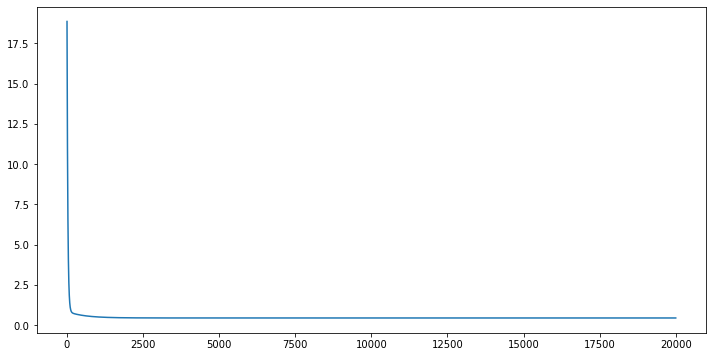

In [106]:
sns.lineplot(y=cost_history,x=range(len(cost_history)))

Отобразите только первые 500 итераций. Похоже, после них модель мало обучается. Мы могли бы применить технику early stopping в данном случае и остановиться на некотором небольшом количестве итераций. Обычно эта техника применяется, чтоб избежать переобучения. При этом теряется немного точности на train set.

<AxesSubplot:>

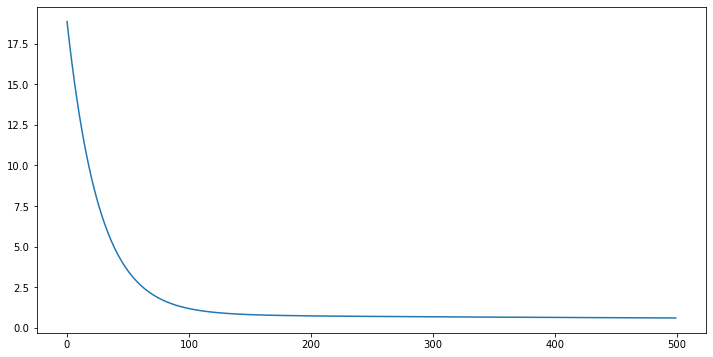

In [107]:
sns.lineplot(y=cost_history[:500],x=range(500))

Выведем полученные параметры и последнее значение функции затрат.

In [108]:
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][-1],theta[1][-1]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
print('Number of iterateions: {:d}'.format(iterations))

Theta0:          3.421,
Theta1:          2.203
Final cost/MSE:  0.442
Number of iterateions: 20000


11.Реализуйте mean_squared_error согласно формуле в лекции (функция очень похожа на cost_function, немного другие входящие переменные).

In [111]:
def my_mean_squared_error(y_true, y_predicted):
    error =  sum((y_predicted - y_true) ** 2) / len(y_true)
    return error

12.Найдите прогнозы на X_train_df, X_test_df и посчитайте ошибку прогнозов на обеих подвыборках.

In [ ]:
X_test

In [121]:
y_train_predicted = predict(X_train, theta)
y_test_predicted = predict(X_test_1, theta)
err_train = my_mean_squared_error(y_train_full,y_train_predicted)
err_test = my_mean_squared_error(y_test,y_test_predicted)

In [122]:
display(err_train, err_test)

array([0.44172119])

array([0.50791127])

13.Выведите диаграмму рассеяния признаков 'Score' и 'GDP per capita' и добавьте линию прогноза модели

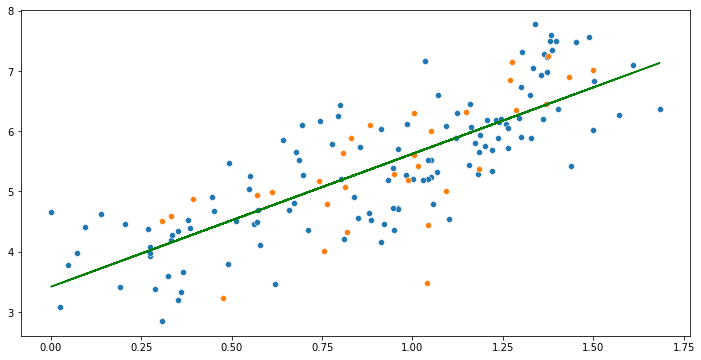

In [150]:
sns.scatterplot(x=X_train_full[:,0], y=y_train_full[:,0])
sns.scatterplot(x=X_test[:,0], y=y_test[:,0])
#X_train_full, X_test, y_train_full, y_test
plt.plot(X_train[:,1], y_train_predicted, color='g');

14.Обучите линейную регрессию на наборе данных состоящем только из признака 'GDP per capita', но теперь используя LinearRegression из sklearn.   
Подумайте, надо ли в sklearn модель подавать колонку из единичек, которую мы подавали в самописную модель.

In [151]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [153]:
lr.fit(X_train, y_train_full)

LinearRegression()

In [154]:
lr.coef_, lr.intercept_

(array([[0.        , 2.20299269]]), array([3.42116754]))

Сравните ошибку на тестовой выборке линейной регрессии, написанной вами, и из sklearn. Есть ли разница в значениях?

15.Давайте обучим линейную регрессию на всех данных и посмотрим, стало ли лучше.

15.1.Обучите линейную регрессию из sklearn используя в качестве набора признаков следующий: 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'

Не забудьте:  
    1. Разделить на train и test.  
    2. Нормировать каждую колонку данных.  

15.2.Выведите ошибку прогноза на train и test выборках. Сравните с результатом, полученным при обучении на одном признаке. Изменились ли метрики?

15.3.Выведите коэффициенты модели и определите, какие признаки имеют стоящие перед ними наибольшие коэффициенты по модулю (достаточно вывести названия признаков и коэффициенты в одном датафрейме).

16.Обучите модель полиномиальной регрессии со степенью 2 на тех же данных, что и в предыдущем пункте. Используйте в процессе обучения PolynomialFeatures. Исследуйте метрики качества на трейн и тест датасетах. Есть ли оверфит?

17.Сделайте пайплайн с шагами MinMaxScaler, PolynomialFeatures и ElasticNet. Проведите поиск оптимальных гиперпараметров на тренировочном наборе данных используя GridSearchCV, метрика качества.   
Какие риперпараметры искать выберите на своё усмотрение, к примеру, это могут быть параметры регуляризации ElasticNet или количество степеней в PolynomialFeatures.  
Выведите значения найденных оптимальных гиперпараметров.  
Лучшую модель из кросс валидации оцените на тестовом наборе данных.  


Какая модель в домашнем задании дала лучшие значения Mean Squared Error на тестовых данных, лин. регрессия написанная самостоятельно, лин. регрессия из sklearn, полиномиальная регрессия со степенями признаков 2, модель найденная в результате поиска гиперпараметров?  